# Filtres et traitement d'image

Blablabla

<a href="https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.array-manipulation.html">doc pertinente</a>

In [1]:
import numpy as np
from PIL import Image


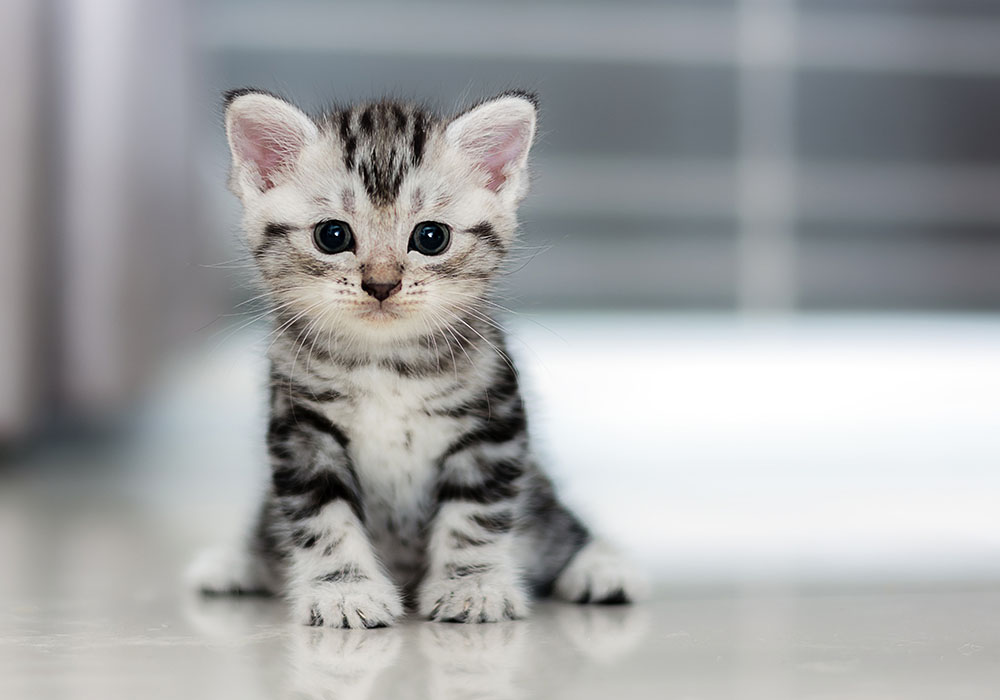

In [2]:
pic = Image.open("img/cat.jpg")
pic

In [3]:
picAsArray = np.array(pic)
print(picAsArray)
print(picAsArray.shape)

[[[188 185 192]
  [188 185 192]
  [188 185 192]
  ..., 
  [ 87  91 100]
  [ 87  91 100]
  [ 87  91 100]]

 [[188 185 192]
  [188 185 192]
  [188 185 192]
  ..., 
  [ 86  90  99]
  [ 86  90  99]
  [ 86  90  99]]

 [[188 185 192]
  [188 185 192]
  [188 185 192]
  ..., 
  [ 86  90  99]
  [ 86  90  99]
  [ 86  90  99]]

 ..., 
 [[208 205 200]
  [208 205 200]
  [208 205 200]
  ..., 
  [194 193 189]
  [194 193 189]
  [194 193 189]]

 [[208 205 200]
  [208 205 200]
  [208 205 200]
  ..., 
  [195 194 190]
  [195 194 190]
  [195 194 190]]

 [[208 205 200]
  [208 205 200]
  [208 205 200]
  ..., 
  [195 194 190]
  [195 194 190]
  [195 194 190]]]
(700, 1000, 3)


In [4]:
def ToBlackAndWhite(i): 
    iAsMatrix = np.array(i)
    averagePerPixel = np.round(np.average(iAsMatrix, axis=2))
    BnW = np.stack((averagePerPixel, averagePerPixel, averagePerPixel), axis=2)
    return(BnW)

In [5]:
pic2 = ToBlackAndWhite(pic)
print(pic2)
print(pic2.shape)


[[[ 188.  188.  188.]
  [ 188.  188.  188.]
  [ 188.  188.  188.]
  ..., 
  [  93.   93.   93.]
  [  93.   93.   93.]
  [  93.   93.   93.]]

 [[ 188.  188.  188.]
  [ 188.  188.  188.]
  [ 188.  188.  188.]
  ..., 
  [  92.   92.   92.]
  [  92.   92.   92.]
  [  92.   92.   92.]]

 [[ 188.  188.  188.]
  [ 188.  188.  188.]
  [ 188.  188.  188.]
  ..., 
  [  92.   92.   92.]
  [  92.   92.   92.]
  [  92.   92.   92.]]

 ..., 
 [[ 204.  204.  204.]
  [ 204.  204.  204.]
  [ 204.  204.  204.]
  ..., 
  [ 192.  192.  192.]
  [ 192.  192.  192.]
  [ 192.  192.  192.]]

 [[ 204.  204.  204.]
  [ 204.  204.  204.]
  [ 204.  204.  204.]
  ..., 
  [ 193.  193.  193.]
  [ 193.  193.  193.]
  [ 193.  193.  193.]]

 [[ 204.  204.  204.]
  [ 204.  204.  204.]
  [ 204.  204.  204.]
  ..., 
  [ 193.  193.  193.]
  [ 193.  193.  193.]
  [ 193.  193.  193.]]]
(700, 1000, 3)


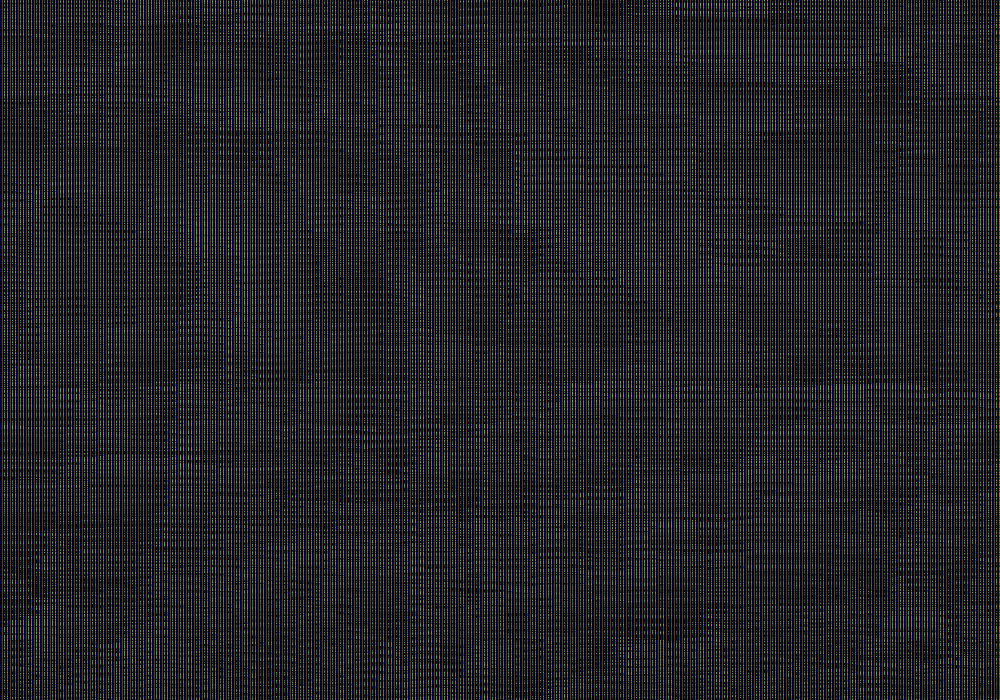

In [6]:
Image.fromarray(pic2, mode ='RGB')

Manifestement, ce n'est pas ainsi qu'il nous faut procéder. <a href="http://www.tannerhelland.com/3643/grayscale-image-algorithm-vb6/">Documentons nous un petit peu</a>


In [7]:
def ToBlackAndWhite(i): 
    iAsMatrix = np.array(i)
    averagePerPixel = np.round(np.average(iAsMatrix, axis=2))
    return(averagePerPixel)

In [8]:
pic2 = ToBlackAndWhite(pic)
print(pic2)
print(pic2.shape)

[[ 188.  188.  188. ...,   93.   93.   93.]
 [ 188.  188.  188. ...,   92.   92.   92.]
 [ 188.  188.  188. ...,   92.   92.   92.]
 ..., 
 [ 204.  204.  204. ...,  192.  192.  192.]
 [ 204.  204.  204. ...,  193.  193.  193.]
 [ 204.  204.  204. ...,  193.  193.  193.]]
(700, 1000)


In [9]:
im = Image.fromarray(pic2)
im.show()

Essayons quelque chose de moins basique. 

<quote>Because humans do not perceive all colors equally, the “average method” of grayscale conversion is inaccurate.  Instead of treating red, green, and blue light equally, a good grayscale conversion will weight each color based on how the human eye perceives it.  A common formula in image processors (Photoshop, GIMP) is:</quote>

<code>Gray = (Red * 0.3 + Green * 0.59 + Blue * 0.11)</code>

In [10]:
def ToBlackAndWhiteCorrected(i): 
    iAsMatrix = np.array(i)
    weights = np.array([0.3,0.59, 0.11])
    BnW = np.ma.average(iAsMatrix, axis = 2, weights= weights)
    return(BnW)

In [11]:
pic2 = ToBlackAndWhiteCorrected(pic)
print(ToBlackAndWhiteCorrected(pic))
print(pic2.shape)
im = Image.fromarray(pic2)
im.show()

[[186.67000000000002 186.67000000000002 186.67000000000002 ..., 90.79 90.79
  90.79]
 [186.67000000000002 186.67000000000002 186.67000000000002 ..., 89.79 89.79
  89.79]
 [186.67000000000002 186.67000000000002 186.67000000000002 ..., 89.79 89.79
  89.79]
 ..., 
 [205.35000000000002 205.35000000000002 205.35000000000002 ..., 192.86
  192.86 192.86]
 [205.35000000000002 205.35000000000002 205.35000000000002 ..., 193.86
  193.86 193.86]
 [205.35000000000002 205.35000000000002 205.35000000000002 ..., 193.86
  193.86 193.86]]
(700, 1000)


Allons plus loin encore en créant une fonction destinée à vieillir n'importe quelle photo de n'importe quelle dimension. Nous disposons pour cela de i) notre fonction ToBlackAndWhiteCorrected ii) et d'un certain nombre d'image dans un dossier spécifique.

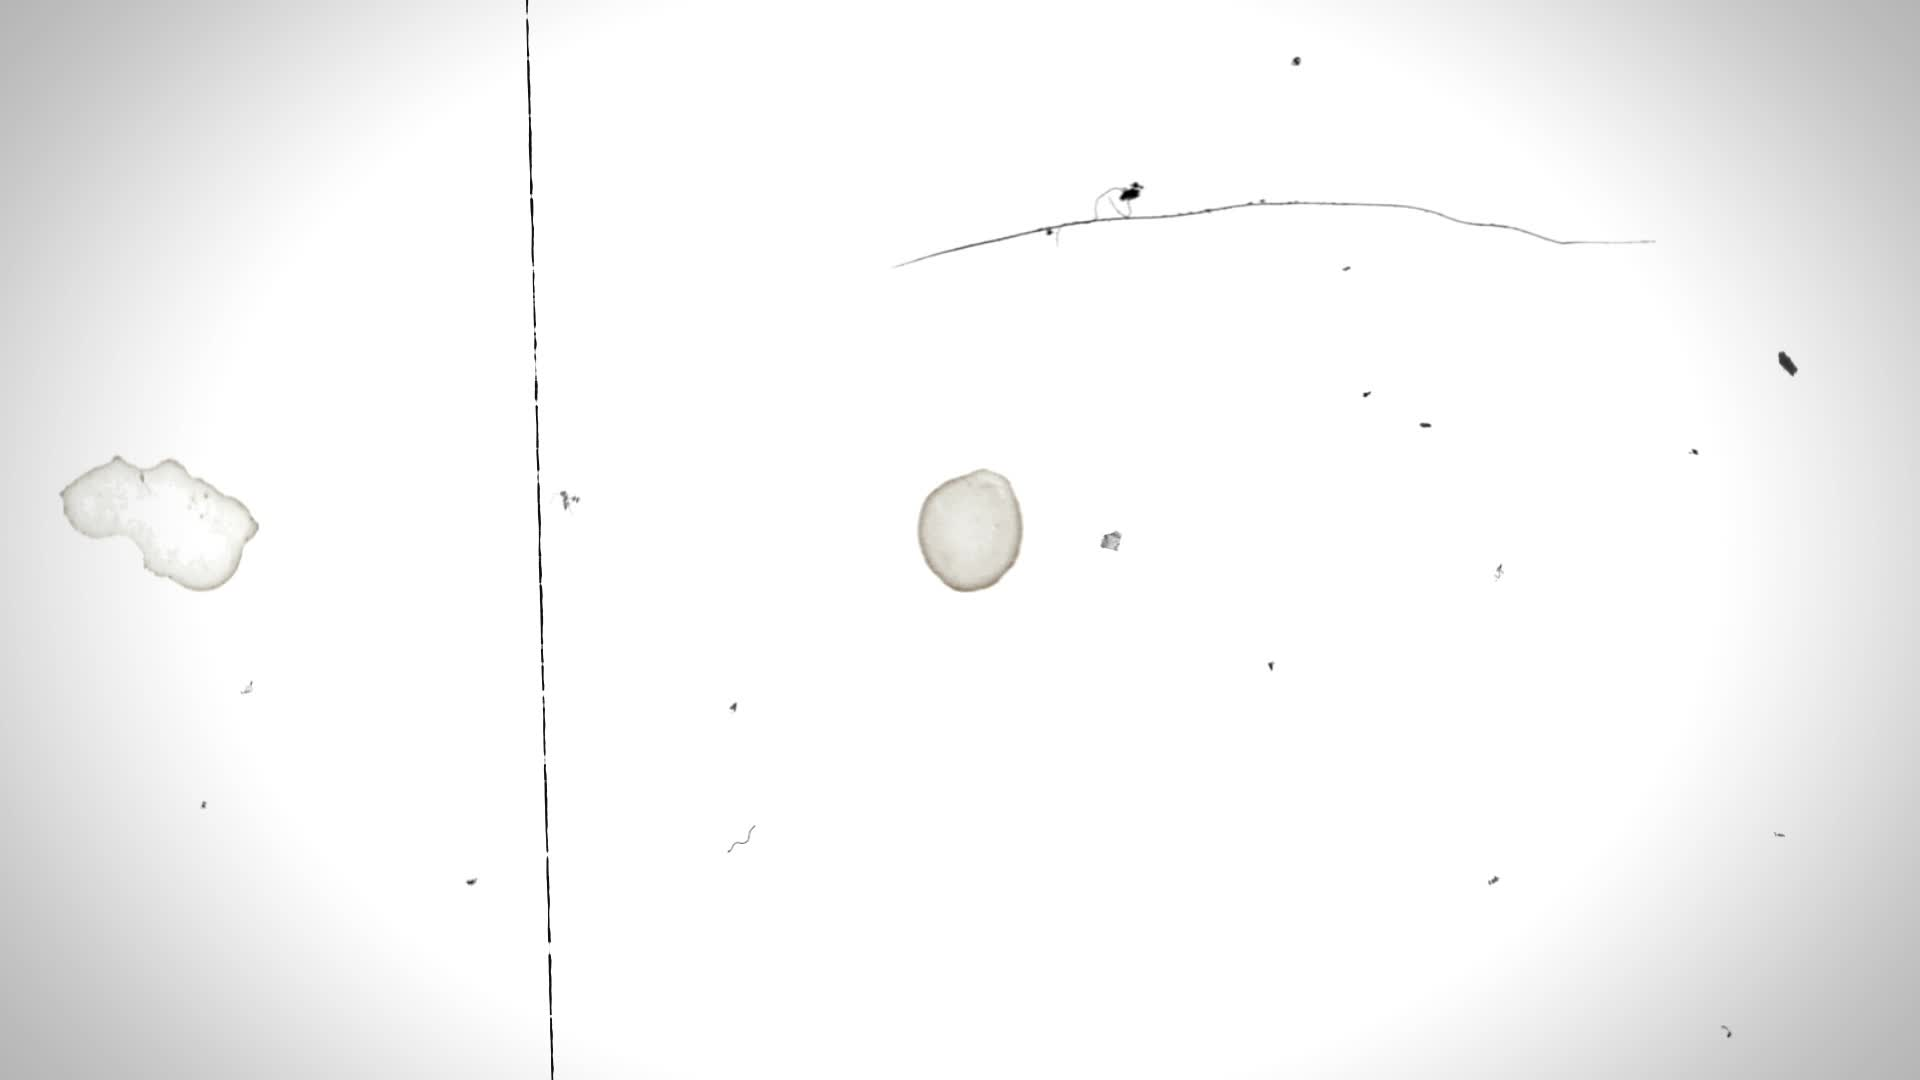

In [12]:
filterOld = Image.open("img/filters/filterold.jpeg")
filterOld

L'idée est simple: i) ajuster un filtres choisi aléatoirement aux dimensions de l'image ii) additionner (+) les deux matrices iii) appliquer la fonction ToBlackAndWhiteCorrected 

In [13]:
import os, random

def Oldify(i):
    filt = random.choice(os.listdir("img/filters")) #change dir name to whatever
    filterOld = Image.open("img/filters/"+filt)
    image = Image.open(i)
    targetsize = image.size
    
    filterOldResized = filterOld.resize(targetsize)    # best down-sizing filter
    
    filterOldAsMatrix = np.array(filterOldResized)
    ImageAsMatrix = np.array(image)
    
    filterOldAsMatrix = ToBlackAndWhiteCorrected(filterOldAsMatrix)
    ImageAsMatrix = ToBlackAndWhiteCorrected(ImageAsMatrix)
    
    oldPic = (filterOldAsMatrix + ImageAsMatrix)/2
    return(oldPic)

pic = Oldify("img/cat.jpg")

old = Image.fromarray(pic)
old.show()

Essayons maintenant de créer un filtre négatif

In [14]:
def ToNeg(i):
    image = Image.open(i)
    imageAsMatrix =  np.array(image)
    imageAsMatrixNeg = 255 - imageAsMatrix
    
    return(imageAsMatrixNeg)

In [15]:
pic = ToNeg("img/cat.jpg")

neg = Image.fromarray(pic)
neg.show()

Une fonction très pratique pour le webdesigner lambda; blanc vers alpha. Il suffit de transformer notre axe 2 pour ajouter une valeur (alpha) tel que:
<ul>
<li> alpha = 0 ssi 255, 255, 255
<li> alpha = 1 sinon
</ul>

In [88]:
def WhiteToAlpha(i):  
    image = Image.open(i)
    imageAsMatrix  =  np.array(image)  # on converti l'image en matrice
    
    alphas = np.apply_over_axes(np.sum, imageAsMatrix, 2) # on créé une matrice de dimension (l,h,1) qui n'est que la somme des éléments d'imageAsMatrix sur l'axe 2 
    alphas = 765.0/alphas    # on divise par 255+255+255 = 765.0 
    alphas = np.round(alphas-1) # on arrondi à l'inférieur pour que seul les 255,255,255 =>1
    
    withalpha = np.concatenate((imageAsMatrix,alphas), axis =2) # on concatène pour obtenir une matrice de dimension (l,h,4)
    return(withalpha)

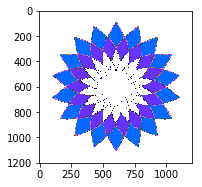

In [89]:
pic = WhiteToAlpha("img/bp.png")

#alphaized = Image.fromarray(pic,mode="RGBA") # bon, nous avons la fonction mais son affichage pose problème
#alphaized.show()

import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(pic)

plt.show() # les codes rgb sont comme décallé (manifestement, on ne peut se fier à l'ordre dans le nom RGBA)

## La librairie Scipy

Après la fork de la PIL, nombre développeurs se sont rabattus sur les modules de la librairie Scipy (<a href="https://www.scipy.org/"> Doc </a>) plus complète et, en particulier, son module <a href="https://docs.scipy.org/doc/scipy/reference/ndimage.html">ndimage</a>

Si nous testions un <a href ="https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.ndimage.filters.gaussian_filter.html">filtre gaussien</a> 

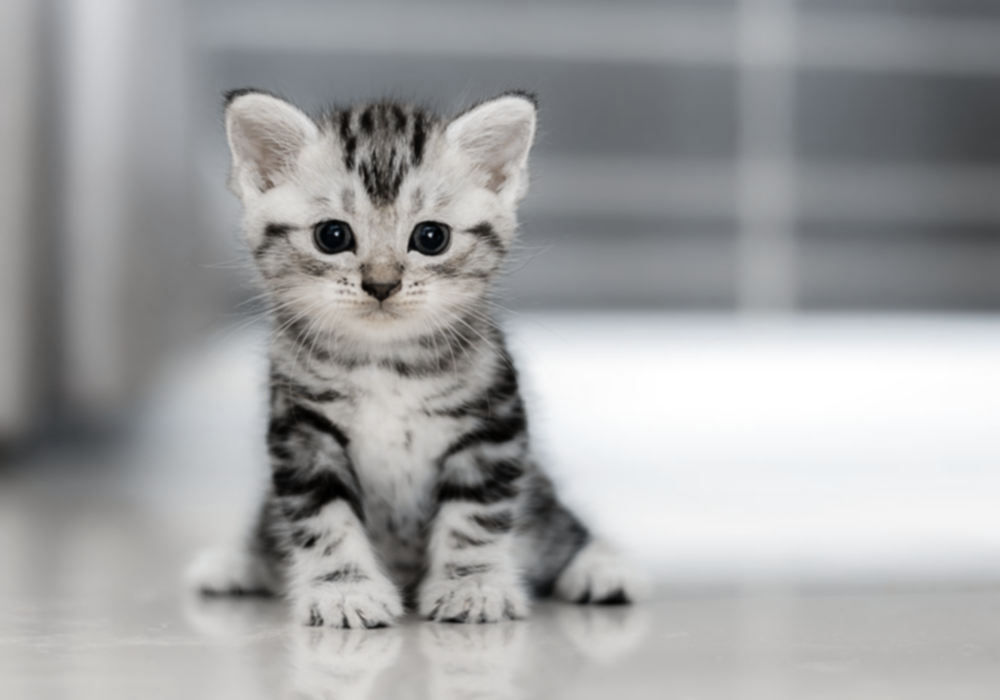

In [80]:
import scipy
import scipy.ndimage

pic = Image.open("img/cat.jpg")
picAsArray = np.array(pic)
BluredPic = scipy.ndimage.filters.gaussian_filter(picAsArray, 1, order=0, mode='reflect')
Image.fromarray(BluredPic)

Une autre fonction très recherchée et appréciée en computer vision est la détection de contour <a href="https://en.wikipedia.org/wiki/Sobel_operator" >à la Sobel </a>

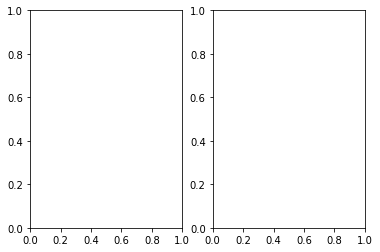

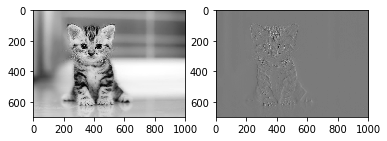

In [81]:
from scipy import misc
import matplotlib.pyplot as plt
fig = plt.figure()
plt.gray()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

pic = Image.open("img/cat.jpg")
BnW = ToBlackAndWhiteCorrected(pic)

result = scipy.ndimage.sobel(BnW)
ax1.imshow(BnW)
ax2.imshow(result)
plt.show()